In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [17]:
# made by chatgpt to install csv as file is to big to commit to github

import kagglehub
import shutil
import os

# Define the current working directory
current_directory = os.getcwd()

# Check if the CSV file already exists in the current directory
csv_exists = any(file.endswith(".csv") for file in os.listdir(current_directory))

if not csv_exists:
    # Download the dataset using kagglehub
    default_path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")

    # Move all downloaded CSV files to the current directory
    for file_name in os.listdir(default_path):
        if file_name.endswith(".csv"):
            shutil.move(os.path.join(default_path, file_name), os.path.join(current_directory, file_name))

    # Delete the downloaded folder after moving the files
    shutil.rmtree(default_path)

    print("Dataset files moved to:", current_directory)
    print(f"Deleted temporary folder: {default_path}")
else:
    print("CSV file already exists in the current directory.")


CSV file already exists in the current directory.


In [18]:
df = pd.read_csv('onlinefraud.csv', header=0)  # Header=0 to use the first row as column names

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [19]:
# convert type to numerical
type_mapping = {
    'CASH_IN': 1,
    'CASH_OUT': 2,
    'DEBIT': 3,
    'PAYMENT': 4,
    'TRANSFER': 5
}
df['type'] = df['type'].map(type_mapping)


# Drop not need columns
df = df.drop(columns=['nameOrig', 'nameDest',])

df.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,4,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,5,181.00,181.0,0.00,0.0,0.0,1,0
3,1,2,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,4,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [20]:
# Define features (X) and target (y)
X = df.drop(columns=['isFraud','isFlaggedFraud'])
y = df['isFraud']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# this snippet is from chatgpt

from sklearn.model_selection import GridSearchCV

# Adjusted hyperparameters for Decision Tree to prevent overfitting
dt_param_grid = {
    'max_depth': [10, 15, 20],  
    'min_samples_split': [20],  
    'min_samples_leaf': [10],   
    'class_weight': ['balanced'],  
    'max_features': ['sqrt'],
    'max_leaf_nodes': [20, 30],
}

# Instantiate the model
dt_model = DecisionTreeClassifier()

# Set up GridSearchCV with relevant parameters
dt_best = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the model to the training data
dt_best.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\mjcul\OneDrive\Documents\GitHub\DataScience\venv\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 15, 20], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [20, 30], 'min_samples_leaf': [10],
                         'min_samples_split': [20]},
             scoring='f1', verbose=1)

In [27]:
# Make predictions
y_pred = dt_best.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1906351
           1       0.03      0.91      0.05      2435

    accuracy                           0.96   1908786
   macro avg       0.51      0.93      0.52   1908786
weighted avg       1.00      0.96      0.98   1908786

Confusion Matrix:
[[1826279   80072]
 [    230    2205]]


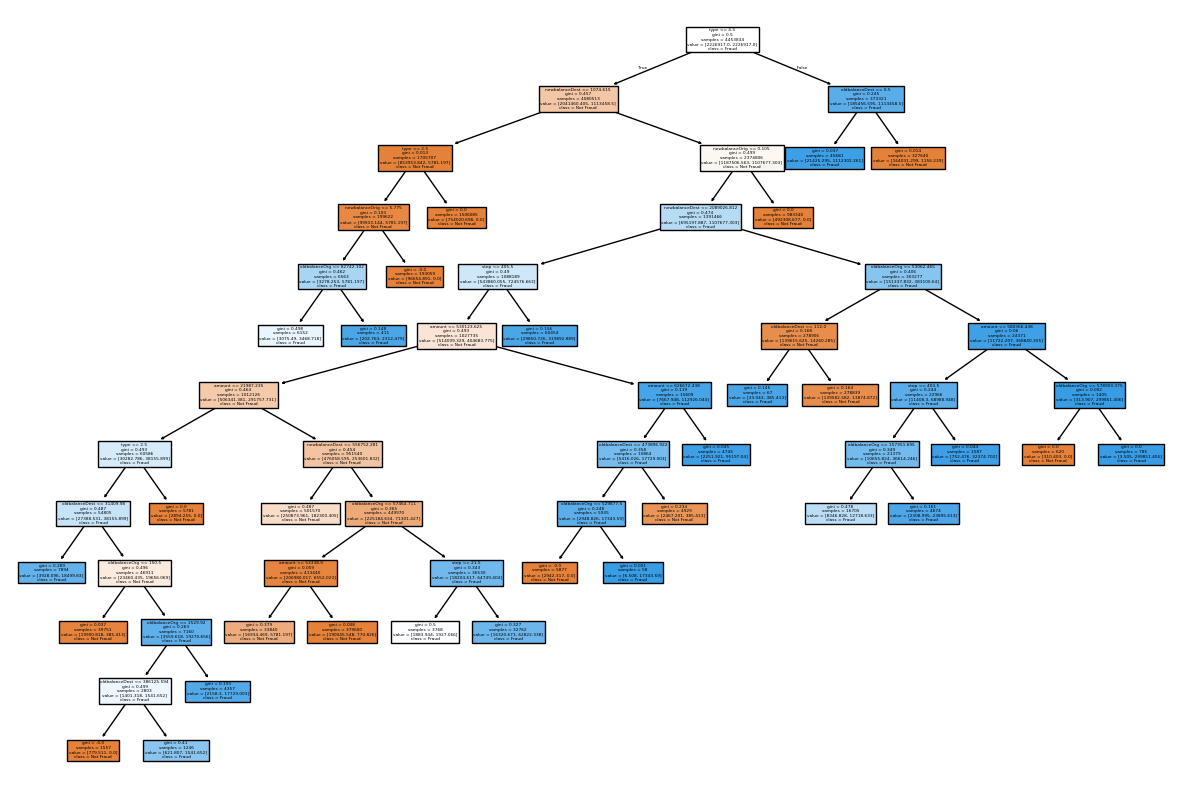

In [29]:
# Get the best decision tree model from GridSearchCV
best_tree = dt_best.best_estimator_  # Extract the best decision tree model

# Plot the tree
plt.figure(figsize=(15, 10))  # Make the picture bigger
plot_tree(best_tree, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], filled=True)
plt.show()